# データの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# CSVデータｎ読み込み
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 分布の確認

In [5]:
import seaborn as sns

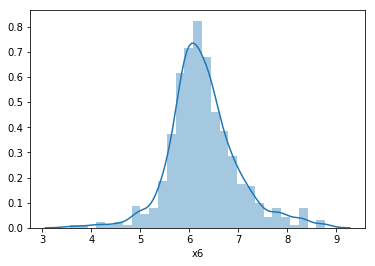

In [7]:
sns.distplot(df['x6'])

# 外れ値除去(3σ法)

In [8]:
col = 'x6'

In [12]:
mean = df.mean()

In [11]:
mean[col]

6.284634387351788

In [15]:
# 標準偏差(standard deviation)
sigma = df.std()

In [14]:
sigma[col]

0.7026171434153234

In [16]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [17]:
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [20]:
df2 = df[(df[col] > low) & (df[col] < high)]

In [21]:
len(df)

506

In [22]:
len(df2)

498

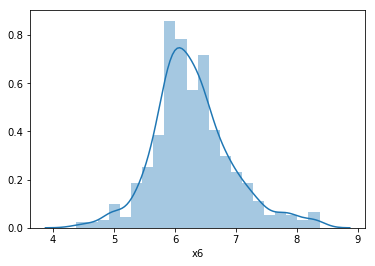

In [24]:
sns.distplot(df2['x6'])

In [26]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [27]:
_df = df
for col in cols:
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [28]:
len(df)

506

In [29]:
len(_df)

415

対処法

- 外れ値は取り除く
- 外れ値を平均もしくは中央値などで埋める
- 主成分分布などを使って、潜在変数に変換した後に3σ法を適用

# 入力変数と出力変数に分割

In [30]:
_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [31]:
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

# 訓練データと検証データに分割

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 重回帰分析

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
# モデルを宣言
model = LinearRegression()

In [40]:
# モデルの学習
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# 検証
model.score(X_train, y_train)

0.7972109224535133

In [42]:
model.score(X_test, y_test)

0.625377600432959

In [43]:
# 過学習(オーバーフィッティング)

# スケーリング

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# scalerの宣言
scaler = StandardScaler()

In [46]:
# scalerの学習
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [48]:
# モデルの宣言
model = LinearRegression()

In [49]:
# モデルの学習
model.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# 検証
model.score(X_train2, y_train)

0.7972109224535133

In [51]:
model.score(X_test2, y_test)

0.6253776004329595

In [52]:
# 重みの確認
model.coef_

array([-1.95426423e-01,  2.11543329e-01,  5.08277354e-01, -8.88178420e-16,
       -1.21336016e+00,  3.91986658e+00, -3.69861217e-01, -1.85711554e+00,
        1.16625182e+00, -1.52855186e+00, -1.87256630e+00,  2.44427080e-01,
       -2.76100147e+00])

In [55]:
np.set_printoptions(precision=2, suppress=True)

In [56]:
model.coef_

array([-0.2 ,  0.21,  0.51, -0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

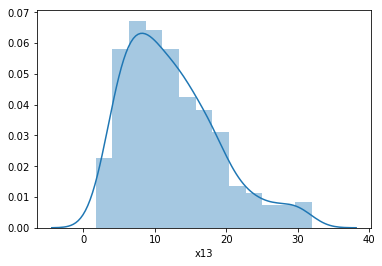

In [58]:
sns.distplot(_df['x13'])